In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder



# Business Questions
1.How does education level impact years of coding experience?

2.What is the most common education level among experienced developers?

3.How do developers with different education levels prefer to learn?

In [75]:
# Load dataset
file_path = "stack_overflow_data.csv"  # Update with your dataset path
print("Loading dataset...")
print("Dataset loaded successfully.")

Loading dataset...
Dataset loaded successfully.


In [76]:
# Selecting relevant columns
selected_columns = ['EdLevel', 'YearsCodePro', 'LearnCodeOnline']
df_selected = df[selected_columns].copy()
print("Selected relevant columns.")

Selected relevant columns.


In [77]:
# Data exploration
print("Exploring data...")
print("Data Head:\n", df_selected.head())
print("\nData Info:\n")
df_selected.info()
print("\nMissing Values:\n", df_selected.isnull().sum())
print("\nDescriptive Statistics:\n", df_selected.describe(include='all'))
print("Data exploration complete.")

Exploring data...
Data Head:
                                              EdLevel YearsCodePro  \
0                          Primary/elementary school          NaN   
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)           17   
2    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)           27   
3  Some college/university study without earning ...          NaN   
4  Secondary school (e.g. American high school, G...          NaN   

                                     LearnCodeOnline  
0                                                NaN  
1  Technical documentation;Blogs;Books;Written Tu...  
2  Technical documentation;Blogs;Books;Written Tu...  
3  Stack Overflow;How-to videos;Interactive tutorial  
4  Technical documentation;Blogs;Written Tutorial...  

Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   EdLevel  

In [78]:
# Data preprocessing
print("Preprocessing data...")
df_selected.fillna('Unknown', inplace=True)
df_selected['YearsCodePro'] = pd.to_numeric(df_selected['YearsCodePro'], errors='coerce')
df_selected.dropna(subset=['YearsCodePro'], inplace=True)
print("Missing values handled and data cleaned.")


Preprocessing data...
Missing values handled and data cleaned.


C:\Users\71499\AppData\Local\Temp\ipykernel_19556\2503659334.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='EdLevel', y='YearsCodePro', data=df_selected, ci=None)


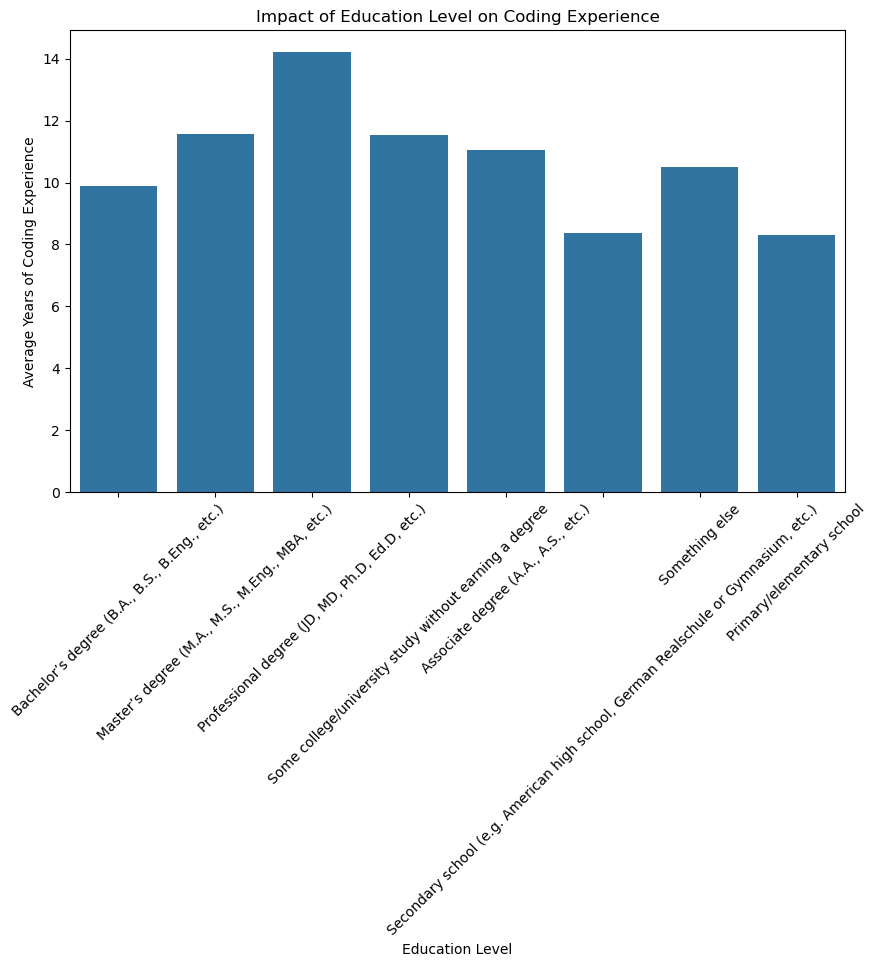

Education vs Coding Experience visualization completed.


In [82]:
# Question 1: How does education level impact years of coding experience?
plt.figure(figsize=(10, 6))
sns.barplot(x='EdLevel', y='YearsCodePro', data=df_selected, ci=None)
plt.xticks(rotation=45)
plt.title('Impact of Education Level on Coding Experience')
plt.ylabel('Average Years of Coding Experience')
plt.xlabel('Education Level')
plt.show()
print("Education vs Coding Experience visualization completed.")

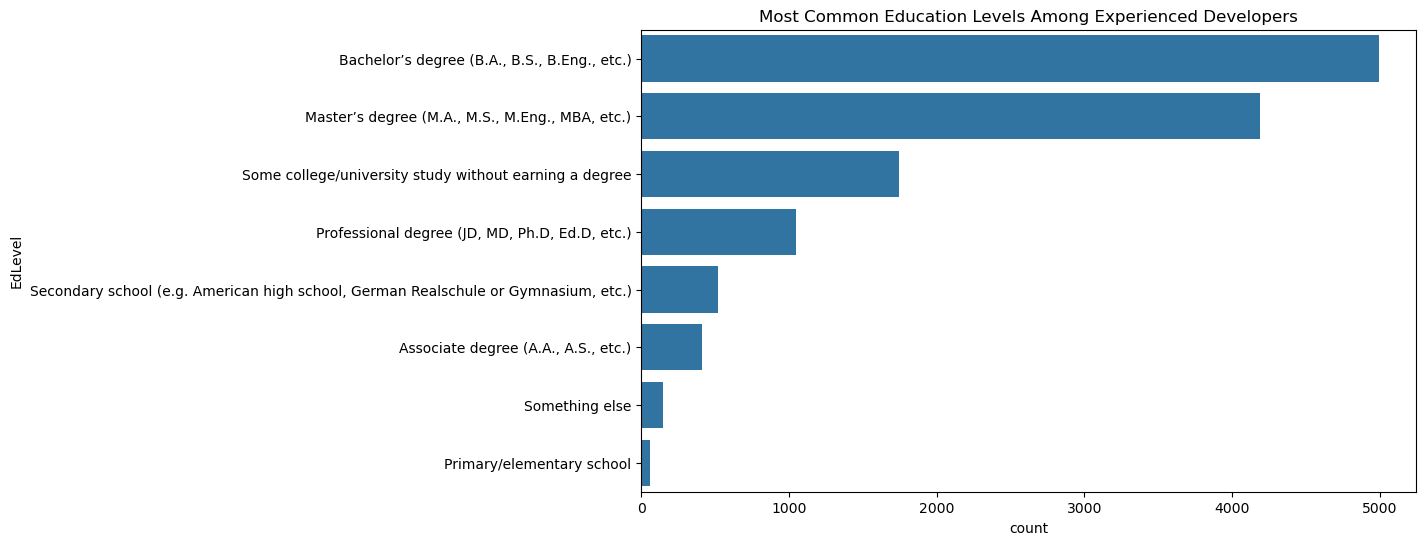

Common education level among experienced developers visualization completed.


In [80]:
# Question 2: What is the most common education level among experienced developers?
experienced_dev_threshold = df_selected['YearsCodePro'].quantile(0.75)
experienced_devs = df_selected[df_selected['YearsCodePro'] >= experienced_dev_threshold]
plt.figure(figsize=(10, 6))
sns.countplot(y='EdLevel', data=experienced_devs, order=experienced_devs['EdLevel'].value_counts().index)
plt.title('Most Common Education Levels Among Experienced Developers')
plt.show()
print("Common education level among experienced developers visualization completed.")


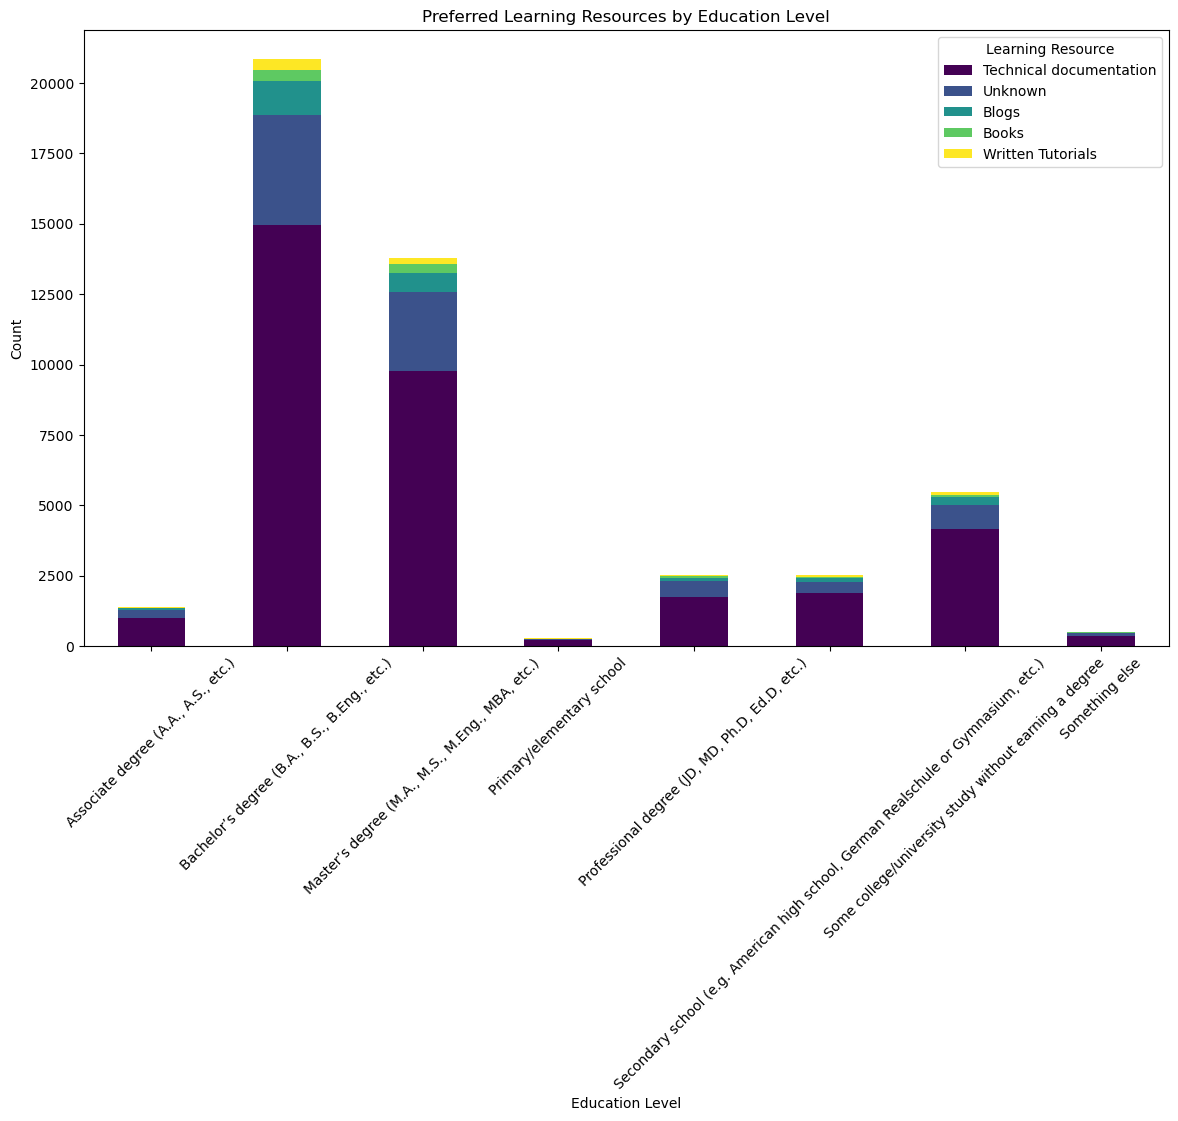

In [90]:
#Q3: How do developers with different education levels prefer to learn?
# Simplify the LearnCodeOnline column to focus on primary learning resources
df_selected['PrimaryLearningResource'] = df_selected['LearnCodeOnline'].apply(
    lambda x: x.split(';')[0] if isinstance(x, str) else 'Unknown'
)

# Group by education level and learning resource
learning_counts = df_selected.groupby(['EdLevel', 'PrimaryLearningResource']).size().unstack(fill_value=0)

# Select the most used learning resources for better visualization
top_resources = learning_counts.sum().nlargest(5).index
learning_counts = learning_counts[top_resources]

# Plot a stacked bar chart
learning_counts.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

plt.title('Preferred Learning Resources by Education Level')
plt.ylabel('Count')
plt.xlabel('Education Level')
plt.xticks(rotation=45)
plt.legend(title='Learning Resource')
plt.show()

